In [1]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [3]:
def generate_random_words(num_words, min_length=3, max_length=10):
    words = set()
    while len(words) < num_words:
        word_length = random.randint(min_length, max_length)
        word = ''.join(random.choices(string.ascii_letters, k=word_length))
        words.add(word)
    return list(words)

captcha_words_1 = generate_random_words(25000, 5, 7)
captcha_words_2 = generate_random_words(25000, 5, 7)

unique = []
for word in captcha_words_2:
    for char in word[::]:
        found = 0
        for i in range(len(unique)):
            if unique[i][0] == char:
                unique[i][1] += 1
                found = 1
                break
        if found == 0:
            unique.append([char, 1])

least = 100000
for i in range(len(unique)):
    if unique[i][1] < least:
        least = unique[i][1]

print(least)
print(len(unique))

print(bool(set(captcha_words_1) & set(captcha_words_2)))

2784
[['o', 2895], ['P', 2784], ['S', 2926], ['x', 2871], ['n', 2894], ['X', 2851], ['J', 2870], ['e', 2864], ['C', 2813], ['f', 2823], ['A', 2903], ['W', 2872], ['c', 2868], ['l', 2919], ['O', 2961], ['d', 3054], ['z', 2941], ['s', 2911], ['N', 2828], ['r', 2885], ['p', 2946], ['w', 2827], ['Q', 2882], ['B', 2903], ['j', 2876], ['a', 2845], ['R', 2877], ['H', 2887], ['E', 2944], ['D', 2905], ['Y', 2906], ['F', 2899], ['Z', 2926], ['h', 2980], ['I', 2846], ['v', 2828], ['M', 2825], ['G', 2915], ['u', 2904], ['L', 2850], ['K', 2886], ['y', 2838], ['q', 2805], ['t', 2840], ['g', 2858], ['U', 2979], ['b', 2891], ['m', 2891], ['k', 2910], ['i', 2870], ['V', 2933], ['T', 2933]]
52
False


1
(128, 128)


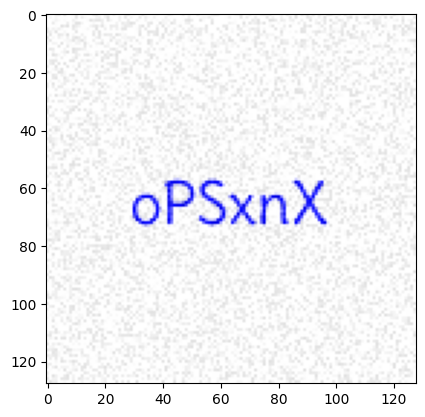

In [4]:
font_paths = [
    # 'RubikIso-Regular.ttf',
    'Delius-Regular.ttf',
]
font_size = 20
noise_level = 30

output_dir = "../Task2/multichar"
os.makedirs(output_dir, exist_ok=True)

def add_noise_to_image(image, noise_level):

    pixels = image.load()

    for i in range(image.size[0]):
        for j in range(image.size[1]):

            noise = random.randint(-noise_level, noise_level)
            r, g, b = pixels[i, j]
            pixels[i, j] = (
                min(255, max(0, r + noise)),
                min(255, max(0, g + noise)),
                min(255, max(0, b + noise))
            )

    return image

i = 0

for word in captcha_words_2:
    
    img = Image.new("RGB", (128, 128), color=(255, 255, 255))
    draw = ImageDraw.Draw(img)

    total_width = 0
    font_path = font_paths[0]
    font = ImageFont.truetype(font_path, font_size)

    for letter in word: 
        letter_bbox = font.getbbox(letter)
        total_width += letter_bbox[2] - letter_bbox[0]

    _, y_min, _, y_max = font.getbbox("Ay")
    text_height = y_max - y_min

    x_position = (img.width - total_width) // 2
    y_position = (img.height - text_height) // 2

    for letter in word:

        draw.text((x_position, y_position), letter, font=font, fill="blue")

        letter_bbox = font.getbbox(letter)
        letter_width = letter_bbox[2] - letter_bbox[0]

        x_position += letter_width

    img = add_noise_to_image(img, noise_level)
    img.save(os.path.join(output_dir, f"{word}2.png"))

    i+=1
    print(i)

    # plt.imshow(img)
    # break